### Se importan las librerias y el dataset original ###

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("AccidentesAviones.csv")

### Visulizacion del dataset original ###

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [4]:
df.head(5)


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


### Variables del dataset original ###

Unnamed: 0: Columna sin nombre que parece ser un índice 
fecha: Fecha del accidente.
HORA declarada: Hora declarada del accidente.
Ruta: Ruta del vuelo.
OperadOR: Compañía aérea.
flight_no: Número de vuelo.
route: Propocito del vuelo.
ac_type: Tipo de aeronave.
registration: Registro de la aeronave.
cn_ln: Número de construcción o de serie / número de línea o de fuselaje.
all_aboard: Total de personas a bordo.
PASAJEROS A BORDO: Número de pasajeros a bordo.
crew_aboard: Número de tripulantes a bordo.
cantidad de fallecidos: Cantidad de personas fallecidas en el accidente.
passenger_fatalities: Número de pasajeros fallecidos.
crew_fatalities: Número de tripulantes fallecidos.
ground: Número de personas fallecidas en tierra.
summary: Resumen del accidente aéreo.


### Observaciones ###

-A simple vista se observa que hay muchos valores faltantes a los cuales se les asignó el singo de pregunta '?' 
se procede a reemplazarlos por valores nuelos y a determinar el porcentaje que representan

-Se identifican y eliminan las columnas que no serán necesarias en el analisis

-Se eliminan el resto de registros con valores faltantes.

-Los tipos de datos y formatos no son los correctos, se procede a corregirlos.

-Los nombres de las variables no son uniformes, se procede a normalizarlos. 

### Se reemplezan los "?" por nulos ###

In [5]:
# Se cuenta la cantidad '?'
interrogaciones = (df == "?").sum().sum()
print("Valores igual a '?':", interrogaciones)


Valores igual a '?': 7953


In [6]:
# Se reemplazan los caracteres  "?" por None
for columna in df.columns:
    df[columna] = df[columna].replace('?', None)


In [7]:
# Se observa el porcentaje de valores nulos en el DataFrame
sh = list(df.shape)
Porcentaje_nulos = round((df.isnull().sum())/sh[0], 2)

Porcentaje_nulos


Unnamed: 0                0.00
fecha                     0.00
HORA declarada            0.30
Ruta                      0.00
OperadOR                  0.00
flight_no                 0.74
route                     0.15
ac_type                   0.00
registration              0.05
cn_ln                     0.13
all_aboard                0.00
PASAJEROS A BORDO         0.04
crew_aboard               0.04
cantidad de fallecidos    0.00
passenger_fatalities      0.05
crew_fatalities           0.05
ground                    0.01
summary                   0.01
dtype: float64

### Teniendo en cuenta el porcentaje de valores nulos en cada variable se eliminan las columnas irrelevantes y el resto de registro con valores faltantes ###

In [8]:
df = df.drop(['Unnamed: 0', 'HORA declarada', 'flight_no', 'cn_ln', "summary" ], axis=1)


In [9]:

df = df.dropna()


### Se aplica formato a las variables ###

In [10]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y')
df['fecha'] = pd.to_datetime(df['fecha'])

In [11]:
df['all_aboard'] = df['all_aboard'].astype(int)
df['PASAJEROS A BORDO'] = df['PASAJEROS A BORDO'].astype(int)
df['crew_aboard'] = df['crew_aboard'].astype(int)
df['cantidad de fallecidos'] = df['cantidad de fallecidos'].astype(int)
df['passenger_fatalities'] = df['passenger_fatalities'].astype(int)
df['crew_fatalities'] = df['crew_fatalities'].astype(int)
df['ground'] = df['ground'].astype(int)


### Normalizado de los nombre de las variables ###

In [12]:
df.rename(columns={
    'fecha': 'Fecha',
    'Ruta': 'Ruta',
    'OperadOR': 'Operadora',
    'route': 'Proposito_del_Vuelo',
    'ac_type': 'Tipo_de_Aeronave',
    'registration': 'N_Registro',
    'all_aboard': 'Total_abordo',
    'PASAJEROS A BORDO': 'Pasajeros_Abordo',
    'crew_aboard': 'Tripulacion_Abordo',
    'cantidad de fallecidos': 'N_Fallecidos',
    'passenger_fatalities': 'Pasajeros_Fallecidos',
    'crew_fatalities': 'Tripulacion_Fallecida',
    'ground': 'Fallecidos_en_Tierra',

}, inplace=True)


### Se extrae el año de la columna "fecha" ###

In [13]:
df['año'] = df['Fecha'].dt.year


###### EDA ######

### Correlacion de variables numericas ###

In [14]:
variables_numericas = df.select_dtypes(include=['int'])
print(variables_numericas.columns.tolist())


['Total_abordo', 'Pasajeros_Abordo', 'Tripulacion_Abordo', 'N_Fallecidos', 'Pasajeros_Fallecidos', 'Tripulacion_Fallecida', 'Fallecidos_en_Tierra', 'año']


### Datos estadisticos ###

In [15]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Total_abordo,4037.0,34.32,48.89,0.0,7.0,18.0,39.0,644.0
Pasajeros_Abordo,4037.0,29.67,46.76,0.0,4.0,14.0,34.0,614.0
Tripulacion_Abordo,4037.0,4.66,3.54,0.0,2.0,4.0,6.0,61.0
N_Fallecidos,4037.0,24.48,37.87,0.0,4.0,12.0,27.0,583.0
Pasajeros_Fallecidos,4037.0,20.87,36.20,0.0,1.0,9.0,23.0,560.0
Tripulacion_Fallecida,4037.0,3.70,3.13,0.0,2.0,3.0,5.0,33.0
Fallecidos_en_Tierra,4037.0,1.87,61.44,0.0,0.0,0.0,0.0,2750.0
año,4037.0,1972.98,23.73,1919.0,1954.0,1972.0,1993.0,2021.0


### Mapa de Calor ###

C:\Users\Martin\AppData\Local\Temp\ipykernel_12228\3418784761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


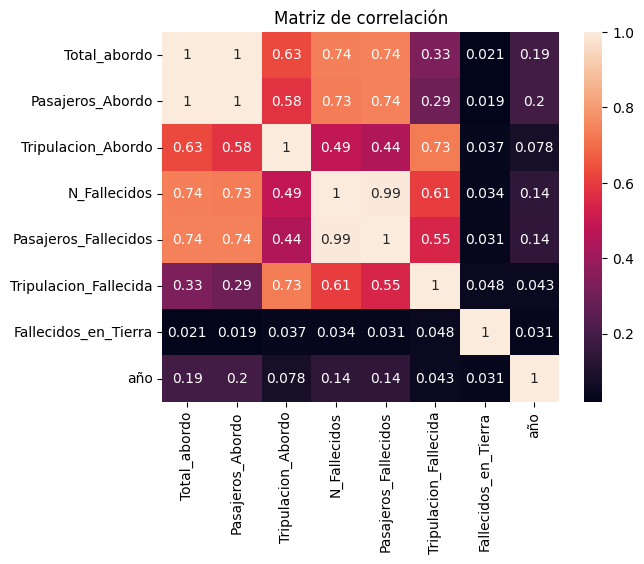

In [16]:
# Visualizar correlaciones
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matriz de correlación", fontsize=12)
plt.show()


 ### Observacion del mapa de de calor ###

 En terminos generales las unicas variables con una baja correlacion es "Fallecidos_en_Tierra" 

### Histogramas de variable numericas ###

<function matplotlib.pyplot.show(close=None, block=None)>

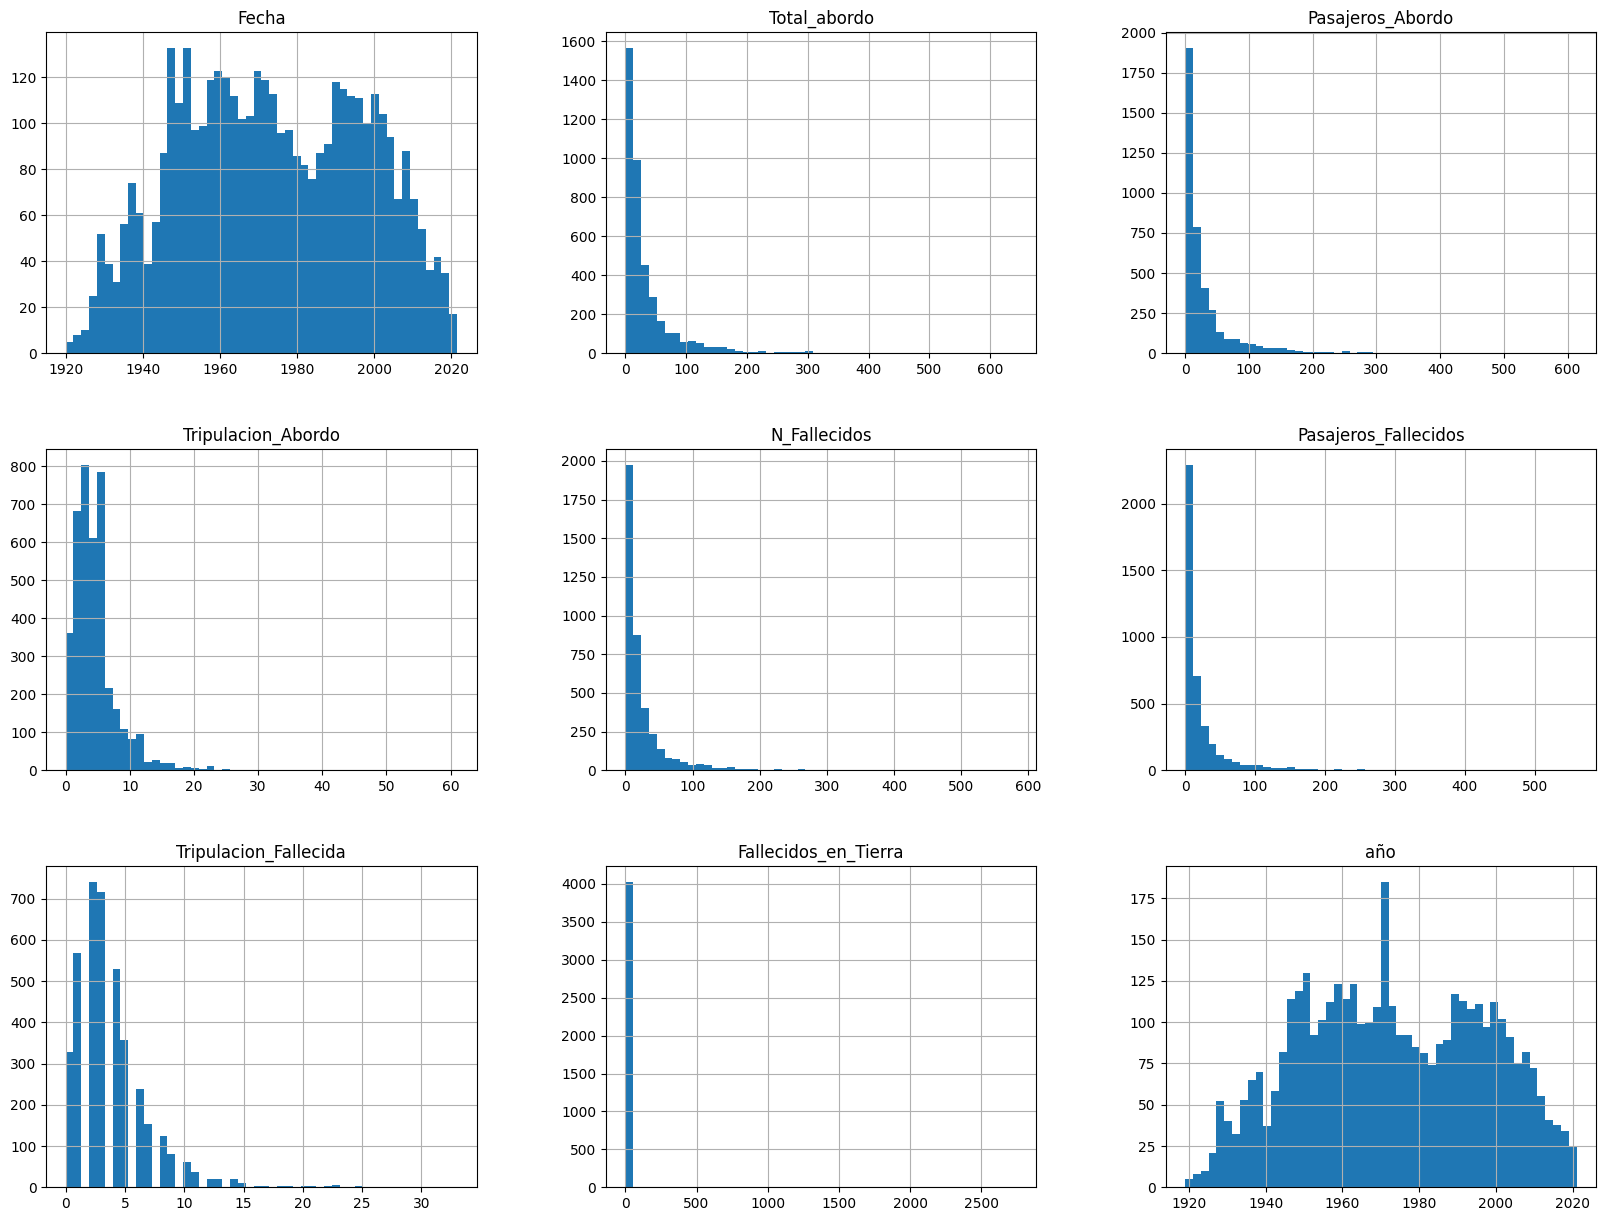

In [17]:
df.hist(bins=50, figsize=(20, 15))
plt.show


### Analisis de variables categoricas ###

In [18]:
variables_categoricas = df.select_dtypes(include=['object'])
print(variables_categoricas.columns.tolist())


['Ruta', 'Operadora', 'Proposito_del_Vuelo', 'Tipo_de_Aeronave', 'N_Registro']


In [19]:
df[['Ruta', 'Operadora', 'Proposito_del_Vuelo',
    'Tipo_de_Aeronave', 'N_Registro']].head()


,Ruta,Operadora,Proposito_del_Vuelo,Tipo_de_Aeronave,N_Registro
32,"Catherham, Surrey, UK",Aircraft Travel Transport,Paris - Hounslow,de Havilland DH-4,G-EAHF
34,"Newark, New Jersey",US Aerial Mail Service,Washington - Newark,De Havilland DH-4,72
49,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA
61,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD
62,"Near Murchinson River, Australia",West Australian Airways,Geraldton - Derby,Bristol 28 Tourer,G-AUDI


In [20]:
for columna in variables_categoricas.columns:
    conteo_valores = df[columna].value_counts()
    print(f"Variable: {columna}")
    print(conteo_valores)
    print()


Variable: Ruta
Moscow, Russia                        15
Manila, Philippines                   14
New York, New York                    13
Rio de Janeiro, Brazil                11
Sao Paulo, Brazil                     11
                                      ..
San Andres de Giles, Argentina         1
Staten Island / Brooklyn, New York     1
Munich, West Germany                   1
Cebu City, Philippines                 1
Palana, Russia                         1
Name: Ruta, Length: 3359, dtype: int64

Variable: Operadora
Aeroflot                                   229
Military - U.S. Air Force                  106
Air France                                  59
United Air Lines                            42
Deutsche Lufthansa                          41
                                          ... 
Emirates Air Transport                       1
Inex Adria Aviopromet / British Airways      1
Military - Spanish Air Force                 1
Sabah Air                                    1
Kamc

### Se genera la columna Tasa_Mortalidad a partir del numero de fallecifos y el total de personas abordo ###

In [21]:
#Se crea la columna "Tasa_Mortalidad"

df['Tasa_de_Mortalidad'] = df['N_Fallecidos'] / df['Total_abordo']


### Se genera la columna Ciudadad a partir de la Ciudad de origen del vuelo ###

In [22]:


df['Ciudad'] = df['Proposito_del_Vuelo'].str.split(' - ').str[0]
